In [1]:
import numpy as np
import pandas as pd
import konlpy 
from konlpy.tag import Mecab
import matplotlib as plt
import re
from tqdm import tqdm
from soykeyword.proportion import CorpusbasedKeywordExtractor

In [2]:
ref=pd.read_csv("attraction_all_translate.csv",encoding='utf-8')

ref=ref.drop([ref.columns[6],ref.columns[7],ref.columns[8]], axis=1)
ref.head()


,space,type,language,day,text,score
0,힐스파,체험,한국어,201702,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,5
1,힐스파,체험,한국어,201711,경치가 좋은 스파 너무 좋아요. 해운대 바다가 보이는 스파라서 스파하는동안 기분이 ...,5
2,힐스파,체험,한국어,201710,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...,4
3,힐스파,체험,한국어,201602,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...",5
4,힐스파,체험,한국어,201504,해운대 달맞이고개의 찜질방. 찜질하는 찜질방입니다. 스파도 같이 운영합니다. 방문객...,3


In [3]:
for index,row in ref.iterrows():
    if ref['score'][index]=="5" or ref['score'][index]=="4":
        ref['score'][index]=1
    else:
        ref['score'][index]=0

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
ref.head()

,space,type,language,day,text,score
0,힐스파,체험,한국어,201702,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,1
1,힐스파,체험,한국어,201711,경치가 좋은 스파 너무 좋아요. 해운대 바다가 보이는 스파라서 스파하는동안 기분이 ...,1
2,힐스파,체험,한국어,201710,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...,1
3,힐스파,체험,한국어,201602,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...",1
4,힐스파,체험,한국어,201504,해운대 달맞이고개의 찜질방. 찜질하는 찜질방입니다. 스파도 같이 운영합니다. 방문객...,0


In [5]:
mecab=Mecab(dicpath="C:\mecab\mecab-ko-dic")

for index, row in ref.iterrows():
    ref['text'][index]=re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', '',ref['text'][index])

ref['token']=ref['text'].apply(mecab.pos)
ref.head()

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,space,type,language,day,text,score,token
0,힐스파,체험,한국어,201702,경치 최고 찜질방에서 하루 숙박했습니다 달맞이길 윗쪽에 위치해서 해운대 일대가 한눈...,1,"[(경치, NNG), (최고, NNG), (찜질방, NNG), (에서, JKB), ..."
1,힐스파,체험,한국어,201711,경치가 좋은 스파 너무 좋아요 해운대 바다가 보이는 스파라서 스파하는동안 기분이 좋...,1,"[(경치, NNG), (가, JKS), (좋, VA), (은, ETM), (스파, ..."
2,힐스파,체험,한국어,201710,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소 주차도 잘 됩니다 ...,1,"[(여독, NNG), (풀, VV), (기, ETN), (좋, VA), (은, ET..."
3,힐스파,체험,한국어,201602,달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며 고지대에 위치한 덕분에 ...,1,"[(달맞이, NNG), (고개, NNG), (의, JKG), (훌륭, XR), (한..."
4,힐스파,체험,한국어,201504,해운대 달맞이고개의 찜질방 찜질하는 찜질방입니다 스파도 같이 운영합니다 방문객이 많...,0,"[(해운대, NNG), (달맞이, NNG), (고개, NNG), (의, JKG), ..."


In [12]:
ref['word']=0
for index, row in tqdm(ref.iterrows()):
    temp=""
    for word in ref['token'][index]:
        if word[1] in ['VV','VA','NNG']:#'
            temp+=word[0]
            temp+=" "
    ref['word'][index]=temp
ref.head()        

0it [00:00, ?it/s]C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
140it [00:00, 673.56it/s]

복잡
복잡
복잡


208it [00:00, 546.95it/s]

복잡
복잡
복잡


506it [00:00, 576.97it/s]

복잡
복잡
복잡
복잡


1965it [00:03, 491.54it/s]

복잡


3187it [00:05, 920.60it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡


3862it [00:06, 731.09it/s]

복잡
복잡


4070it [00:06, 569.10it/s]

복잡


4865it [00:08, 513.39it/s]

복잡


5264it [00:08, 569.43it/s]

복잡


5774it [00:09, 549.33it/s]

복잡


6108it [00:10, 545.63it/s]

복잡


6951it [00:11, 541.26it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡


7183it [00:12, 551.77it/s]

복잡
복잡
복잡


8570it [00:14, 521.63it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡


8681it [00:15, 513.26it/s]

복잡
복잡


8893it [00:15, 513.60it/s]

복잡


9120it [00:15, 550.39it/s]

복잡


9870it [00:17, 545.50it/s]

복잡
복잡


10213it [00:17, 559.58it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡


10449it [00:18, 556.77it/s]

복잡
복잡
복잡
복잡
복잡


10729it [00:18, 541.06it/s]

복잡
복잡


10839it [00:19, 528.81it/s]

복잡
복잡
복잡
복잡
복잡
복잡

10999it [00:19, 520.38it/s]


복잡
복잡
복잡
복잡
복잡


11107it [00:19, 517.71it/s]

복잡
복잡
복잡
복잡
복잡
복잡


11267it [00:19, 521.58it/s]

복잡
복잡
복잡


11489it [00:20, 522.06it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡


11648it [00:20, 509.85it/s]

복잡
복잡
복잡


11882it [00:21, 568.98it/s]

복잡


12446it [00:21, 910.90it/s]

복잡
복잡
복잡
복잡

12713it [00:21, 867.45it/s]


복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡


12801it [00:22, 728.53it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡

12946it [00:22, 585.88it/s]


복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡


13178it [00:22, 525.89it/s]

복잡
복잡
복잡
복잡
복잡


13517it [00:23, 530.63it/s]

복잡


15380it [00:27, 506.75it/s]

복잡
복잡
복잡
복잡


15760it [00:27, 512.12it/s]

복잡


16081it [00:28, 502.77it/s]

복잡


16961it [00:30, 495.36it/s]

복잡


17062it [00:30, 497.03it/s]

복잡
복잡
복잡

17215it [00:30, 480.52it/s]

17360it [00:31, 468.46it/s]

복잡


17776it [00:32, 442.42it/s]

복잡


17922it [00:32, 452.62it/s]

복잡
복잡
복잡
복잡


18520it [00:33, 501.77it/s]

복잡
복잡


18867it [00:34, 459.01it/s]

복잡
복잡
복잡
복잡
복잡


19110it [00:34, 452.94it/s]

복잡


19305it [00:35, 449.58it/s]

복잡


19474it [00:35, 509.80it/s]

복잡


19732it [00:36, 450.02it/s]

복잡


19929it [00:36, 466.72it/s]

복잡


20242it [00:37, 649.21it/s]

복잡
복잡


20956it [00:38, 588.89it/s]

복잡


21291it [00:38, 495.05it/s]

복잡


21444it [00:39, 488.07it/s]

복잡
복잡


22044it [00:40, 513.69it/s]

복잡


22256it [00:40, 482.13it/s]

복잡
복잡


22652it [00:41, 481.35it/s]

복잡


22910it [00:42, 487.06it/s]

복잡
복잡
복잡
복잡
복잡
복잡


23331it [00:43, 523.13it/s]

복잡


23536it [00:43, 492.78it/s]

복잡


23844it [00:44, 498.37it/s]

복잡
복잡
복잡
복잡
복잡
복잡


24141it [00:44, 466.38it/s]

복잡


24304it [00:45, 514.09it/s]

복잡
복잡
복잡


25277it [00:46, 495.30it/s]

복잡
복잡


25631it [00:47, 497.59it/s]

복잡
복잡
복잡
복잡


25780it [00:48, 470.69it/s]

복잡


26246it [00:49, 499.84it/s]

복잡


26449it [00:49, 488.49it/s]

복잡
복잡


26648it [00:49, 477.29it/s]

복잡
복잡
복잡
복잡
복잡
복잡


26750it [00:50, 481.96it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡


26903it [00:50, 495.47it/s]

복잡


27102it [00:50, 478.34it/s]

복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡
복잡


27248it [00:51, 476.86it/s]

복잡
복잡
복잡
복잡
복잡


27347it [00:51, 476.32it/s]

복잡
복잡
복잡


27594it [00:51, 483.88it/s]

복잡
복잡
복잡


27752it [00:52, 531.53it/s]


복잡


,space,type,language,day,text,score,token,word
0,힐스파,체험,한국어,201702,경치 최고 찜질방에서 하루 숙박했습니다 달맞이길 윗쪽에 위치해서 해운대 일대가 한눈...,1,"[(경치, NNG), (최고, NNG), (찜질방, NNG), (에서, JKB), ...",경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙박 ...
1,힐스파,체험,한국어,201711,경치가 좋은 스파 너무 좋아요 해운대 바다가 보이는 스파라서 스파하는동안 기분이 좋...,1,"[(경치, NNG), (가, JKS), (좋, VA), (은, ETM), (스파, ...",경치 좋 좋 해운대 바다 보이 하 동안 기분 좋 야외 있 좋
2,힐스파,체험,한국어,201710,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소 주차도 잘 됩니다 ...,1,"[(여독, NNG), (풀, VV), (기, ETN), (좋, VA), (은, ET...",여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜질방...
3,힐스파,체험,한국어,201602,달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며 고지대에 위치한 덕분에 ...,1,"[(달맞이, NNG), (고개, NNG), (의, JKG), (훌륭, XR), (한...",달맞이 고개 목욕탕 달맞이 고개 자리 고지대 위치 덕분 목욕탕 해운대 아경 감상 있...
4,힐스파,체험,한국어,201504,해운대 달맞이고개의 찜질방 찜질하는 찜질방입니다 스파도 같이 운영합니다 방문객이 많...,0,"[(해운대, NNG), (달맞이, NNG), (고개, NNG), (의, JKG), ...",해운대 달맞이 고개 찜질방 찜질 찜질방 운영 방문객 많 숙박 숙소 사람 많 싸우 밑...


In [7]:
shoppint=[]
culture=[]
nature=[]
history=[]
experience=[]
scene=[]
etc=[]
etc_festival=[]
etc_info=[]
festival=[]
temp=[]

In [8]:
shopping_1=[]
culture_1=[]
nature_1=[]
history_1=[]
experience_1=[]
scene_1=[]
etc_1=[]
etc_festival_1=[]
etc_info_1=[]
festival_1=[]
temp_1=[]
for index, row in ref.iterrows():
    if ref['type'][index] in '문화':
        culture_1.append(row)
    elif ref['type'][index] in '쇼핑':
        shopping_1.append(row)
    elif ref['type'][index] in '자연':
        nature_1.append(row)
    elif ref['type'][index] in '역사':
        history_1.append(row)
    elif ref['type'][index] in '체험':
        experience_1.append(row)
    elif ref['type'][index] in '경관':
        scene_1.append(row)
    elif ref['type'][index] in '기타':
        etc_1.append(row)
    elif ref['type'][index] in '기타-축체':
        etc_festival_1.append(row)
    elif ref['type'][index] in '기타-안내':
        etc_info_1.append(row)
    elif ref['type'][index] in '축제':
        festival_1.append(row)
    else:
        temp_1.append(row)
culture=pd.DataFrame(culture_1)
shopping=pd.DataFrame(shopping_1)
nature=pd.DataFrame(nature_1)
history=pd.DataFrame(history_1)
experience=pd.DataFrame(experience_1)
scene=pd.DataFrame(scene_1)
etc=pd.DataFrame(etc_1)
etc_festival=pd.DataFrame(etc_festival_1)
etc_info=pd.DataFrame(etc_info_1)
festival=pd.DataFrame(festival_1)
temp=pd.DataFrame(temp_1) 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(
    min_df=0.02,
    max_df=0.5,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())


X=cv.fit_transform(ref['word'])
cv.vocabulary_

{'보이': 12,
 '하': 25,
 '즐기': 21,
 '잡': 20,
 '가': 0,
 '보': 10,
 '오': 19,
 '되': 5,
 '들어가': 7,
 '먹': 8,
 '앉': 16,
 '알': 17,
 '가지': 1,
 '찾': 23,
 '받': 9,
 '얻': 18,
 '돌': 4,
 '보내': 11,
 '걷': 2,
 '살': 15,
 '들': 6,
 '사': 14,
 '타': 24,
 '걸': 3,
 '붐비': 13,
 '찍': 22}

# 문화

In [76]:
cv_culture=CountVectorizer(
    min_df=0.007,
    max_df=0.01,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

culture_X=cv_culture.fit_transform(culture['word'])

print(culture_X.shape)
cv_culture.vocabulary_

(5989, 148)


{'야외': 81,
 '광장': 12,
 '컨벤션': 125,
 '개최': 3,
 '목적': 43,
 '공연': 8,
 '브랜드': 58,
 '의류': 98,
 '싸': 79,
 '서비스': 67,
 '연결': 84,
 '주차장': 112,
 '카드': 123,
 '평일': 138,
 '여유': 83,
 '교육': 13,
 '시티': 78,
 '중심': 114,
 '놀': 23,
 '비오': 60,
 '이번': 100,
 '영화제': 86,
 '축제': 121,
 '만족': 39,
 '수준': 72,
 '소개': 68,
 '맞': 41,
 '크기': 128,
 '다리': 25,
 '갖': 2,
 '시내': 77,
 '서면': 66,
 '쉬': 74,
 '예상': 87,
 '대중': 27,
 '측면': 122,
 '음료': 97,
 '기다리': 18,
 '폐쇄': 139,
 '디자인': 33,
 '트': 133,
 '그룹': 15,
 '보석': 55,
 '여성': 82,
 '의상': 99,
 '변화': 54,
 '동굴': 30,
 '만나': 37,
 '요금': 93,
 '게임': 6,
 '전시물': 105,
 '만드': 38,
 '넣': 22,
 '손': 71,
 '라인': 35,
 '관리': 11,
 '예약': 88,
 '줄': 113,
 '산책로': 63,
 '숨': 73,
 '종일': 110,
 '구매': 14,
 '소요': 69,
 '페인트': 136,
 '지금': 115,
 '믿': 47,
 '특정': 134,
 '일본인': 102,
 '보통': 56,
 '내용': 21,
 '맛': 40,
 '문제': 46,
 '대신': 26,
 '옛날': 89,
 '슈퍼': 75,
 '도중': 29,
 '기본': 19,
 '기간': 16,
 '이외': 101,
 '컬렉션': 127,
 '나가': 20,
 '조심': 109,
 '관계': 10,
 '행복': 145,
 '통과': 132,
 '특징': 135,
 '원': 95,
 '사항': 62,
 '방문자': 51,
 

In [77]:
culture_names=cv_culture.get_feature_names()
print ( "기능 수 : {}". format (len (culture_names)))
print(culture_names)

기능 수 : 148
['가파르', '간판', '갖', '개최', '걱정', '걸리', '게임', '골목길', '공연', '과거', '관계', '관리', '광장', '교육', '구매', '그룹', '기간', '기념물', '기다리', '기본', '나가', '내용', '넣', '놀', '늦', '다리', '대신', '대중', '대학', '도중', '동굴', '동네', '등반', '디자인', '따르', '라인', '마차', '만나', '만드', '만족', '맛', '맞', '모양', '목적', '무덤', '문', '문제', '믿', '바뀌', '바람', '반나절', '방문자', '배우', '벚꽃', '변화', '보석', '보통', '부족', '브랜드', '비디오', '비오', '사냥', '사항', '산책로', '상상', '색', '서면', '서비스', '소개', '소요', '속', '손', '수준', '숨', '쉬', '슈퍼', '슬로프', '시내', '시티', '싸', '아쿠아리움', '야외', '여성', '여유', '연결', '열', '영화제', '예상', '예약', '옛날', '오르막', '오르막길', '오브제', '요금', '운동', '원', '위아래', '음료', '의류', '의상', '이번', '이외', '일본인', '장면', '전망대', '전시물', '절대', '제안', '조명', '조심', '종일', '주거', '주차장', '줄', '중심', '지금', '지나', '집들이', '체크', '초등', '추억', '축제', '측면', '카드', '커플', '컨벤션', '컬러', '컬렉션', '크기', '태양', '터널', '테마', '통과', '트', '특정', '특징', '페인트', '펭귄', '평일', '폐쇄', '피하', '하이라이트', '하이킹', '학생', '항구', '행복', '환상', '희생']


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(culture_X,culture['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.80
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


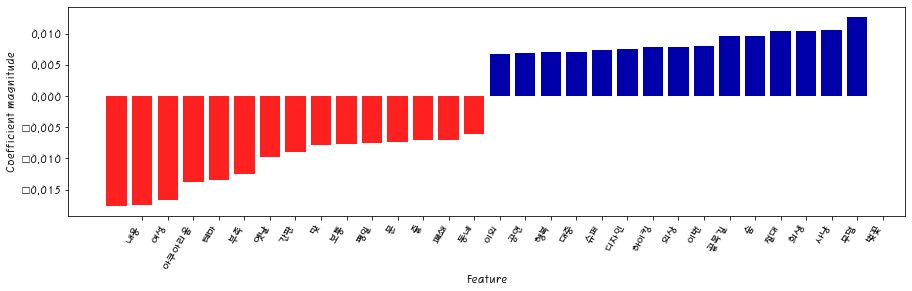

In [79]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, culture_names, n_top_features=15)
plt.show()

# 자연

In [80]:
cv_nature=CountVectorizer(
    min_df=0.02,
    max_df=0.08,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

nature_X=cv_nature.fit_transform(nature['word'])

print(nature_X.shape)
cv_nature.vocabulary_

(6108, 148)


{'주말': 114,
 '여행': 85,
 '축제': 125,
 '주변': 115,
 '시설': 74,
 '편리': 134,
 '아침': 80,
 '되': 39,
 '낮': 24,
 '길': 20,
 '열차': 87,
 '가족': 1,
 '오': 89,
 '건물': 5,
 '야경': 83,
 '끝': 21,
 '느낌': 29,
 '코스': 129,
 '풍경': 137,
 '놀': 26,
 '바닷가': 52,
 '날씨': 23,
 '편안': 135,
 '해수욕장': 141,
 '친구': 126,
 '쉽': 73,
 '광안': 16,
 '도시': 35,
 '카페': 127,
 '음식': 93,
 '전': 106,
 '잡': 103,
 '도착': 36,
 '기분': 18,
 '바람': 53,
 '겨울': 7,
 '정도': 110,
 '보이': 56,
 '해안': 142,
 '최고': 123,
 '사진': 64,
 '찍': 120,
 '휴식': 146,
 '사용': 63,
 '위치': 92,
 '높': 28,
 '비치': 61,
 '식사': 78,
 '분위기': 57,
 '먹': 46,
 '날': 22,
 '물': 50,
 '바': 51,
 '앉': 81,
 '갈매기': 4,
 '파도': 133,
 '명소': 48,
 '찾': 122,
 '사랑': 62,
 '앞': 82,
 '괜찮': 17,
 '다음': 30,
 '관광': 14,
 '추천': 124,
 '시장': 76,
 '마시': 42,
 '아이': 79,
 '차': 121,
 '인기': 96,
 '생각': 68,
 '도보': 34,
 '관광객': 15,
 '도로': 33,
 '공원': 13,
 '하루': 139,
 '넓': 25,
 '주위': 116,
 '후': 145,
 '저녁': 105,
 '집': 119,
 '역': 86,
 '상점': 67,
 '공연': 12,
 '인근': 95,
 '놀이': 27,
 '불': 58,
 '옆': 88,
 '커피': 128,
 '대부분': 32,
 '일몰': 98,
 '시작'

In [81]:
nature_names=cv_nature.get_feature_names()
print ( "기능 수 : {}". format (len (nature_names)))
print(nature_names)

기능 수 : 148
['가깝', '가족', '가지', '가치', '갈매기', '건물', '걸', '겨울', '경우', '경치', '경험', '계단', '공연', '공원', '관광', '관광객', '광안', '괜찮', '기분', '기차', '길', '끝', '날', '날씨', '낮', '넓', '놀', '놀이', '높', '느낌', '다음', '대교', '대부분', '도로', '도보', '도시', '도착', '돌', '동안', '되', '들', '등대', '마시', '말', '맑', '매력', '먹', '멋지', '명소', '무료', '물', '바', '바닷가', '바람', '바위', '보내', '보이', '분위기', '불', '불꽃', '붐비', '비치', '사랑', '사용', '사진', '산', '산책로', '상점', '생각', '선택', '섬', '수영', '수족관', '쉽', '시설', '시작', '시장', '시즌', '식사', '아이', '아침', '앉', '앞', '야경', '얻', '여행', '역', '열차', '옆', '오', '오후', '우산', '위치', '음식', '이상', '인근', '인기', '일', '일몰', '일부', '입구', '자연', '작', '잡', '재미', '저녁', '전', '전망대', '전체', '절벽', '정도', '정류장', '제공', '조명', '주말', '주변', '주위', '지하철', '지하철역', '집', '찍', '차', '찾', '최고', '추천', '축제', '친구', '카페', '커피', '코스', '태양', '투어', '티켓', '파도', '편리', '편안', '포장', '풍경', '필요', '하루', '해산물', '해수욕장', '해안', '혼잡', '활동', '후', '휴식', '흥미']


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(nature_X,nature['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.85
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


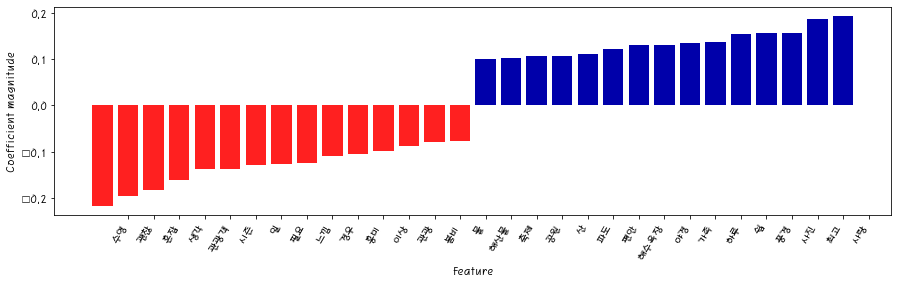

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, nature_names, n_top_features=15)
plt.show()

# 역사

In [131]:
cv_history=CountVectorizer(
    min_df=0.03,
    max_df=0.5,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

history_X=cv_history.fit_transform(history['word'])

print(history_X.shape)
cv_history.vocabulary_

(3129, 144)


{'불교': 62,
 '해운대': 140,
 '사찰': 68,
 '잡': 102,
 '없': 83,
 '하': 135,
 '분위기': 61,
 '장소': 103,
 '해안': 139,
 '근처': 18,
 '가': 0,
 '도착': 33,
 '곳': 13,
 '계단': 11,
 '올라가': 89,
 '지역': 120,
 '느낌': 25,
 '들어가': 40,
 '사람': 64,
 '좋': 112,
 '바다': 50,
 '보': 59,
 '도시': 32,
 '산': 69,
 '산책': 70,
 '입구': 98,
 '방문': 56,
 '보이': 60,
 '같': 3,
 '필요': 134,
 '되': 38,
 '역사': 86,
 '일부': 97,
 '제공': 111,
 '찾': 124,
 '명소': 47,
 '주말': 113,
 '관광': 14,
 '주차장': 116,
 '시간': 75,
 '생각': 71,
 '주변': 114,
 '바닷가': 51,
 '경치': 9,
 '도로': 31,
 '사진': 67,
 '찍': 122,
 '작': 101,
 '위치': 92,
 '얻': 82,
 '절': 107,
 '때': 41,
 '많': 42,
 '바위': 53,
 '전체': 106,
 '돌': 35,
 '길': 21,
 '투어': 130,
 '전망': 105,
 '아름답': 77,
 '앞': 80,
 '즐기': 118,
 '쉽': 74,
 '풍경': 133,
 '관광객': 15,
 '추천': 126,
 '다음': 27,
 '여행': 84,
 '차': 123,
 '말': 43,
 '위': 91,
 '정도': 109,
 '들': 39,
 '최고': 125,
 '경우': 8,
 '하이킹': 137,
 '가치': 2,
 '지하철': 121,
 '역': 85,
 '후': 142,
 '다리': 26,
 '이상': 94,
 '걷': 6,
 '전': 104,
 '택시': 129,
 '음식': 93,
 '가지': 1,
 '먹': 45,
 '버스': 58,
 '거리': 4,
 '타': 12

In [132]:
history_names=cv_history.get_feature_names()
print ( "기능 수 : {}". format (len (history_names)))
print(history_names)

기능 수 : 144
['가', '가지', '가치', '같', '거리', '건물', '걷', '걸', '경우', '경치', '경험', '계단', '고요', '곳', '관광', '관광객', '궁사', '그림', '근처', '기념품', '기도', '길', '나무', '날', '날씨', '느낌', '다리', '다음', '단계', '대부분', '도달', '도로', '도시', '도착', '독특', '돌', '동상', '동안', '되', '들', '들어가', '때', '많', '말', '매력', '먹', '멋지', '명소', '무료', '물', '바다', '바닷가', '바람', '바위', '밖', '받', '방문', '방법', '버스', '보', '보이', '분위기', '불교', '붐비', '사람', '사랑', '사용', '사진', '사찰', '산', '산책', '생각', '성전', '소원', '쉽', '시간', '신발', '아름답', '아침', '알', '앞', '언덕', '얻', '없', '여행', '역', '역사', '옆', '오', '올라가', '용', '위', '위치', '음식', '이상', '인상', '일', '일부', '입구', '자연', '자체', '작', '잡', '장소', '전', '전망', '전체', '절', '절벽', '정도', '정류장', '제공', '좋', '주말', '주변', '주요', '주차장', '준비', '즐기', '지', '지역', '지하철', '찍', '차', '찾', '최고', '추천', '출구', '타', '택시', '투어', '편안', '평화', '풍경', '필요', '하', '하루', '하이킹', '해변', '해안', '해운대', '혼잡', '후', '흥미']


In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(history_X,history['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.85
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


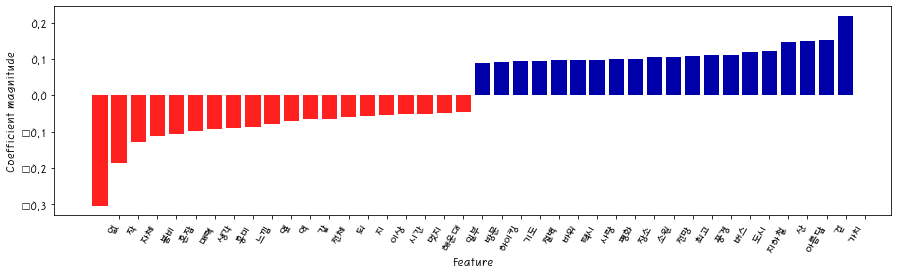

In [134]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, history_names, n_top_features=20)
plt.show()

# 체험

In [175]:
cv_experience=CountVectorizer(
    min_df=0.03,
    max_df=0.1,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

experience_X=cv_experience.fit_transform(experience['word'])

print(experience_X.shape)
cv_experience.vocabulary_

(1440, 179)


{'최고': 155,
 '하루': 171,
 '위치': 118,
 '해운대': 174,
 '보이': 63,
 '기분': 17,
 '야외': 100,
 '풀': 169,
 '여행': 103,
 '자리': 134,
 '비싸': 69,
 '물': 53,
 '즐기': 148,
 '이용': 123,
 '식사': 89,
 '옆': 107,
 '레스토랑': 39,
 '다음': 28,
 '날': 19,
 '아침': 93,
 '택시': 165,
 '거리': 7,
 '평일': 168,
 '밤': 58,
 '야경': 99,
 '보': 61,
 '오': 109,
 '층': 158,
 '안': 94,
 '영어': 105,
 '일본어': 128,
 '방법': 59,
 '밖': 56,
 '들어가': 35,
 '느낌': 26,
 '시티': 87,
 '처음': 153,
 '체험': 154,
 '몸': 50,
 '괜찮': 14,
 '먹': 49,
 '음식': 120,
 '기대': 16,
 '이상': 122,
 '앉': 95,
 '식당': 88,
 '맛있': 47,
 '알': 96,
 '일반': 127,
 '요금': 114,
 '온도': 111,
 '종류': 144,
 '다양': 27,
 '마사지': 43,
 '놀': 24,
 '공간': 12,
 '수영장': 83,
 '선택': 78,
 '크': 162,
 '외국인': 113,
 '가족': 1,
 '사우나': 73,
 '작': 136,
 '아이': 92,
 '커플': 161,
 '마지막': 45,
 '부분': 64,
 '주': 145,
 '이후': 125,
 '돈': 31,
 '가지': 2,
 '자신': 135,
 '서비스': 77,
 '일': 126,
 '필요': 170,
 '취하': 157,
 '주말': 146,
 '말': 46,
 '도착': 30,
 '욕조': 117,
 '바디': 55,
 '호텔': 176,
 '자': 133,
 '찾': 152,
 '바닥': 54,
 '전': 140,
 '역': 104,
 '지하철': 150,
 '저녁'

In [176]:
experience_names=cv_experience.get_feature_names()
print ( "기능 수 : {}". format (len (experience_names)))
print(experience_names)

기능 수 : 179
['가능', '가족', '가지', '가치', '개인', '객실', '거대', '거리', '걷', '게임', '경우', '고급', '공간', '관광객', '괜찮', '근처', '기대', '기분', '긴장', '날', '남성', '낮', '넓', '넣', '놀', '높', '느낌', '다양', '다음', '대부분', '도착', '돈', '돌', '드', '들', '들어가', '땀', '때밀이', '랜드', '레스토랑', '로커', '룰렛', '룸', '마사지', '마시', '마지막', '말', '맛있', '맥주', '먹', '몸', '무료', '문화', '물', '바닥', '바디', '밖', '발', '밤', '방법', '백화점', '보', '보내', '보이', '부분', '분리', '분위기', '비', '비교', '비싸', '사랑', '사물함', '사우', '사우나', '사진', '샤워', '샴푸', '서비스', '선택', '세계', '손', '쇼핑', '수건', '수영장', '쉽', '슈퍼', '시도', '시티', '식당', '식사', '신발', '신세계', '아이', '아침', '안', '앉', '알', '알몸', '앞', '야경', '야외', '얻', '여성', '여행', '역', '영어', '영역', '옆', '예약', '오', '오후', '온도', '옷', '외국인', '요금', '요리', '욕실', '욕조', '위치', '음료', '음식', '의자', '이상', '이용', '이전', '이후', '일', '일반', '일본어', '일부', '입', '입구', '입장료', '자', '자리', '자신', '작', '재미', '재미있', '저녁', '전', '전체', '전통', '제공', '종류', '주', '주말', '준비', '즐기', '지불', '지하철', '직원', '찾', '처음', '체험', '최고', '추가', '취하', '층', '친절', '카지노', '커플', '크', '키', '탈출', '택시', '테마', '테이블', '

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(experience_X,experience['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.82
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


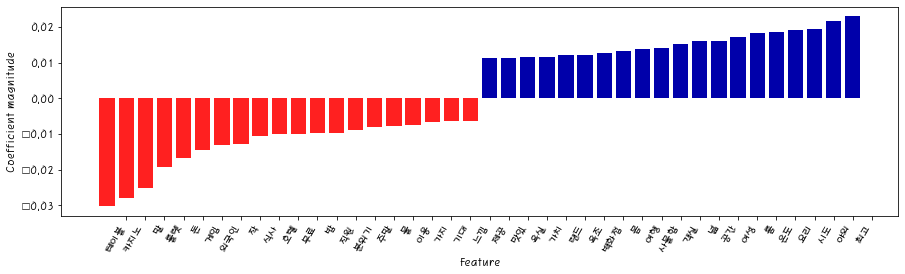

In [179]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, experience_names, n_top_features=20)
plt.show()

# 경관

In [221]:
cv_scene=CountVectorizer(
    min_df=0.01,
    max_df=0.05,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

scene_X=cv_scene.fit_transform(scene['word'])

print(scene_X.shape)
cv_scene.vocabulary_

(5884, 297)


{'식사': 152,
 '모르': 98,
 '커피': 255,
 '바라보': 105,
 '올라가': 179,
 '후': 292,
 '식당': 151,
 '자연': 207,
 '맑': 90,
 '물': 102,
 '분위기': 120,
 '산책로': 133,
 '공사': 23,
 '앞': 161,
 '시작': 149,
 '마을': 84,
 '나오': 50,
 '걸': 11,
 '중심': 235,
 '위치': 184,
 '주위': 231,
 '트': 266,
 '가능': 2,
 '입구': 201,
 '괜찮': 29,
 '넓': 56,
 '국제': 33,
 '시민': 147,
 '항구': 281,
 '주': 227,
 '바람': 106,
 '여름': 169,
 '느낌': 64,
 '받': 109,
 '관광': 24,
 '명소': 97,
 '건물': 10,
 '정도': 220,
 '아침': 157,
 '배': 114,
 '뒤': 77,
 '느끼': 63,
 '공간': 20,
 '시설': 148,
 '늘': 65,
 '세계': 139,
 '다음': 67,
 '안': 158,
 '상점': 135,
 '판매': 269,
 '적': 213,
 '터미널': 262,
 '사': 128,
 '이전': 192,
 '가깝': 1,
 '기대': 39,
 '지하철': 239,
 '도보': 72,
 '접근': 219,
 '만들': 88,
 '점': 218,
 '끝': 47,
 '모습': 99,
 '교통': 30,
 '여유': 170,
 '알': 160,
 '이용': 191,
 '기다리': 38,
 '앉': 159,
 '상징': 136,
 '아이': 156,
 '비교': 126,
 '백화점': 115,
 '전': 214,
 '가운데': 3,
 '기억': 41,
 '처음': 245,
 '시티': 150,
 '전망대': 215,
 '눈': 62,
 '장면': 210,
 '구경': 31,
 '관광객': 25,
 '자갈치': 204,
 '기회': 43,
 '간식': 6,
 '친절': 252,
 '시

In [222]:
scene_names=cv_scene.get_feature_names()
print ( "기능 수 : {}". format (len (scene_names)))
print(experience_names)

기능 수 : 297
['가능', '가족', '가지', '가치', '개인', '객실', '거대', '거리', '걷', '게임', '경우', '고급', '공간', '관광객', '괜찮', '근처', '기대', '기분', '긴장', '날', '남성', '낮', '넓', '넣', '놀', '높', '느낌', '다양', '다음', '대부분', '도착', '돈', '돌', '드', '들', '들어가', '땀', '때밀이', '랜드', '레스토랑', '로커', '룰렛', '룸', '마사지', '마시', '마지막', '말', '맛있', '맥주', '먹', '몸', '무료', '문화', '물', '바닥', '바디', '밖', '발', '밤', '방법', '백화점', '보', '보내', '보이', '부분', '분리', '분위기', '비', '비교', '비싸', '사랑', '사물함', '사우', '사우나', '사진', '샤워', '샴푸', '서비스', '선택', '세계', '손', '쇼핑', '수건', '수영장', '쉽', '슈퍼', '시도', '시티', '식당', '식사', '신발', '신세계', '아이', '아침', '안', '앉', '알', '알몸', '앞', '야경', '야외', '얻', '여성', '여행', '역', '영어', '영역', '옆', '예약', '오', '오후', '온도', '옷', '외국인', '요금', '요리', '욕실', '욕조', '위치', '음료', '음식', '의자', '이상', '이용', '이전', '이후', '일', '일반', '일본어', '일부', '입', '입구', '입장료', '자', '자리', '자신', '작', '재미', '재미있', '저녁', '전', '전체', '전통', '제공', '종류', '주', '주말', '준비', '즐기', '지불', '지하철', '직원', '찾', '처음', '체험', '최고', '추가', '취하', '층', '친절', '카지노', '커플', '크', '키', '탈출', '택시', '테마', '테이블', '

In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(scene_X,scene['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Best cross-validation score: 0.76
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


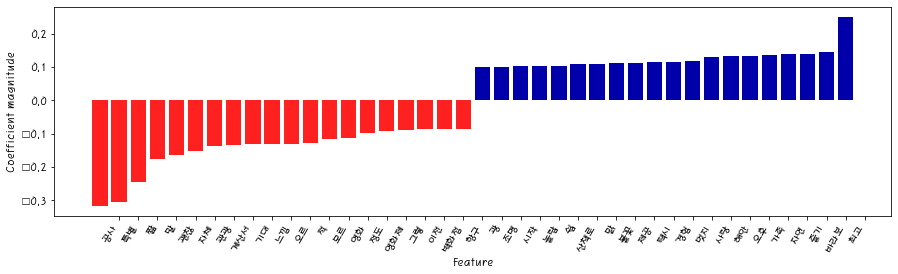

In [225]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, scene_names, n_top_features=20)
plt.show()

# 쇼핑

In [241]:
cv_shopping=CountVectorizer(
    min_df=0.03,
    max_df=0.5,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

shopping_X=cv_shopping.fit_transform(shopping['word'])

print(shopping_X.shape)
cv_shopping.vocabulary_

(3811, 140)


{'쇼핑': 70,
 '좋': 111,
 '브랜드': 56,
 '많': 39,
 '푸드': 129,
 '되': 34,
 '같': 5,
 '작': 99,
 '생각': 66,
 '들': 35,
 '건물': 8,
 '느낌': 28,
 '때': 36,
 '오': 88,
 '신발': 78,
 '곳': 14,
 '가격': 2,
 '방문': 52,
 '물건': 45,
 '찾': 118,
 '정도': 107,
 '옷': 89,
 '하': 131,
 '맛': 41,
 '먹': 43,
 '추천': 120,
 '백화점': 53,
 '구입': 18,
 '크': 123,
 '근처': 20,
 '위치': 92,
 '세계': 69,
 '층': 121,
 '종류': 110,
 '사람': 59,
 '다양': 29,
 '필요': 130,
 '앞': 82,
 '선택': 68,
 '경험': 13,
 '쉽': 72,
 '판매': 125,
 '대부분': 31,
 '관광객': 16,
 '여행': 85,
 '시간': 73,
 '없': 84,
 '국제': 19,
 '경우': 12,
 '상점': 64,
 '사용': 61,
 '걷': 9,
 '날': 24,
 '쇼핑몰': 71,
 '거리': 7,
 '후': 138,
 '지역': 115,
 '높': 27,
 '일부': 97,
 '준비': 114,
 '가게': 1,
 '레스토랑': 37,
 '발견': 50,
 '알': 81,
 '마차': 38,
 '한국어': 132,
 '시도': 74,
 '최고': 119,
 '사': 58,
 '맛있': 42,
 '파': 124,
 '싸': 79,
 '음식': 93,
 '받': 49,
 '제공': 108,
 '보': 54,
 '호텔': 136,
 '관광': 15,
 '지하철': 117,
 '걸': 10,
 '얻': 83,
 '가': 0,
 '거대': 6,
 '동안': 33,
 '장소': 100,
 '일': 95,
 '가지': 3,
 '현지': 135,
 '해운대': 134,
 '의류': 94,
 '주변': 113,
 '가치': 

In [242]:
shopping_names=cv_shopping.get_feature_names()
print ( "기능 수 : {}". format (len (shopping_names)))
print(shopping_names)

기능 수 : 140
['가', '가게', '가격', '가지', '가치', '같', '거대', '거리', '건물', '걷', '걸', '게', '경우', '경험', '곳', '관광', '관광객', '구경', '구입', '국제', '근처', '기념품', '길', '낙지', '날', '냄새', '넓', '높', '느낌', '다양', '다음', '대부분', '돌', '동안', '되', '들', '때', '레스토랑', '마차', '많', '말', '맛', '맛있', '먹', '물', '물건', '물고기', '바다', '밖', '받', '발견', '밤', '방문', '백화점', '보', '분위기', '브랜드', '비싸', '사', '사람', '사시미', '사용', '사진', '살', '상점', '상품', '생각', '생선', '선택', '세계', '쇼핑', '쇼핑몰', '쉽', '시간', '시도', '식당', '식사', '식품', '신발', '싸', '아침', '알', '앞', '얻', '없', '여행', '역', '옆', '오', '옷', '요리', '위층', '위치', '음식', '의류', '일', '일본어', '일부', '자갈치', '작', '장소', '재미', '저녁', '전', '전복', '전통', '점심', '정도', '제공', '제품', '종류', '좋', '주문', '주변', '준비', '지역', '지하', '지하철', '찾', '최고', '추천', '층', '친구', '크', '파', '판매', '팔', '편리', '포장', '푸드', '필요', '하', '한국어', '해산물', '해운대', '현지', '호텔', '활기', '후', '흥미']


In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(shopping_X,shopping['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.69
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


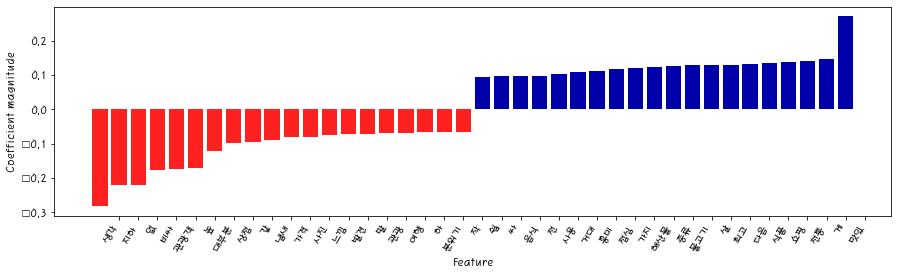

In [244]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, shopping_names, n_top_features=20)
plt.show()

# 축제

In [286]:
cv_festival=CountVectorizer(
    min_df=0.01,
    max_df=0.1,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

festival_X=cv_festival.fit_transform(festival['word'])

print(festival_X.shape)
cv_festival.vocabulary_

(19, 218)


{'최근': 183,
 '간': 4,
 '자리': 149,
 '중요': 167,
 '접하': 156,
 '각지': 3,
 '고품격': 17,
 '포기': 201,
 '고민': 16,
 '무대': 52,
 '인사': 141,
 '추가': 186,
 '해수욕장': 209,
 '부대': 67,
 '기간': 31,
 '셔틀버스': 84,
 '운행': 126,
 '옛날': 116,
 '떠올리': 44,
 '바닷가': 57,
 '중심지': 166,
 '분위기': 69,
 '여': 105,
 '바다': 56,
 '배경': 63,
 '영화배우': 113,
 '오픈': 119,
 '토크': 193,
 '회': 215,
 '유명': 132,
 '주말': 160,
 '집중': 171,
 '설치': 83,
 '생각': 80,
 '체험': 180,
 '야외': 99,
 '새벽': 79,
 '연속': 109,
 '패션': 197,
 '강추': 6,
 '기대': 33,
 '관람': 21,
 '티케': 194,
 '나라': 36,
 '예술': 114,
 '유일': 133,
 '일대': 143,
 '주차': 163,
 '지하': 169,
 '주차장': 164,
 '무료': 53,
 '기다리': 32,
 '페스티벌': 199,
 '빼놓': 71,
 '시민': 90,
 '돌아오': 41,
 '한때': 207,
 '우리나라': 125,
 '국민': 28,
 '받': 58,
 '극장가': 29,
 '중심': 165,
 '초창기': 181,
 '참여': 175,
 '열기': 110,
 '찬물': 173,
 '끼얹': 35,
 '사건': 73,
 '휘청거리': 216,
 '하루': 205,
 '정상': 157,
 '부당': 66,
 '간섭': 5,
 '압력': 97,
 '책임자': 177,
 '책임': 176,
 '앞': 98,
 '가꾸': 0,
 '본래': 64,
 '모습': 50,
 '스케일': 87,
 '볼거리': 65,
 '제공': 158,
 '개막식': 8,
 '구하': 27,
 '빠르': 

In [287]:
festival_names=cv_festival.get_feature_names()
print ( "기능 수 : {}". format (len (festival_names)))
print(festival_names)

기능 수 : 218
['가꾸', '가을', '가정', '각지', '간', '간섭', '강추', '같', '개막식', '개명', '개발', '개방', '개회식', '거리', '건물', '경험', '고민', '고품격', '곡', '공기', '관객', '관람', '관점', '광장', '괴롭히', '구매', '구입', '구하', '국민', '극장가', '근처', '기간', '기다리', '기대', '끄', '끼얹', '나라', '놀랍', '단계', '대표', '대화', '돌아오', '드레스', '때', '떠올리', '매주', '먹', '멋있', '멋지', '명동', '모습', '목적지', '무대', '무료', '묶', '문화', '바다', '바닷가', '받', '발', '발표', '밤', '방문', '배경', '본래', '볼거리', '부당', '부대', '북쪽', '분위기', '빠르', '빼놓', '사', '사건', '사무소', '사이트', '산책로', '상단', '상자', '새벽', '생각', '서명', '설영', '설치', '셔틀버스', '쇼핑', '수요일', '스케일', '스크린', '스팟', '시민', '시설', '시설물', '시스템', '시장', '앉', '알', '압력', '앞', '야외', '어려움', '어울리', '언급', '언어', '얻', '여', '여배우', '여행', '연결', '연속', '열기', '영구', '영어', '영화배우', '예술', '예정', '옛날', '오늘날', '오래', '오픈', '오후', '온라인', '올해', '완공', '완화', '우리나라', '운행', '원', '웹', '위', '위치', '유니크', '유명', '유일', '육성', '음료', '의상', '이륙', '이사', '이외', '이유', '인사', '인재', '일대', '입', '입장권', '입장료', '자금', '자금원', '자리', '자막', '자신', '작', '재능', '재미있', '재생', '접하', '정상', '제공', '조달', '주말', '주변', 

In [289]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(festival_X,festival['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.80
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


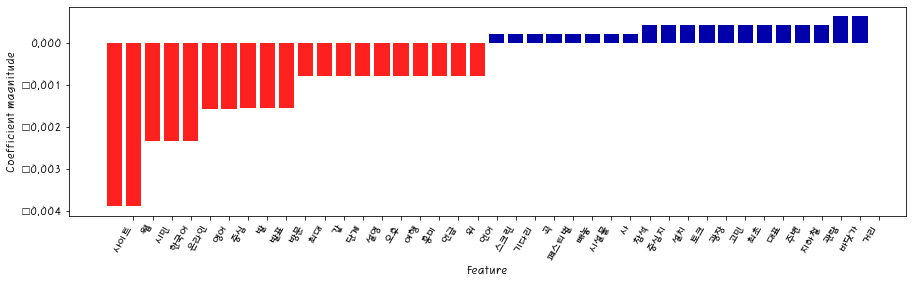

In [290]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, festival_names, n_top_features=20)
plt.show()

# 기타

In [325]:
cv_etc=CountVectorizer(
    min_df=0.02,
    max_df=0.05,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

etc_X=cv_etc.fit_transform(etc['word'])

print(etc_X.shape)
cv_etc.vocabulary_

(1057, 131)


{'앉': 64,
 '주위': 96,
 '중국어': 98,
 '경험': 9,
 '지역': 101,
 '혼잡': 127,
 '거리': 6,
 '길': 16,
 '이해': 79,
 '다음': 24,
 '위치': 75,
 '방문': 44,
 '도움': 27,
 '일': 80,
 '친절': 115,
 '가격': 0,
 '최고': 112,
 '서면': 55,
 '들': 32,
 '장소': 85,
 '직원': 104,
 '이상': 78,
 '주요': 95,
 '편안': 119,
 '동안': 30,
 '돌': 29,
 '오': 71,
 '받': 40,
 '보': 48,
 '수단': 58,
 '방면': 43,
 '처음': 110,
 '짐': 105,
 '앞': 65,
 '좌석': 93,
 '넓': 18,
 '경전철': 8,
 '차량': 108,
 '가능': 1,
 '액세스': 66,
 '갈': 4,
 '모르': 36,
 '호텔': 126,
 '정도': 91,
 '방송': 45,
 '표': 122,
 '느낌': 21,
 '목적지': 37,
 '지도': 99,
 '승차': 60,
 '나오': 17,
 '터미널': 117,
 '얻': 68,
 '제공': 92,
 '찾': 109,
 '선택': 57,
 '후': 130,
 '서비스': 56,
 '작': 84,
 '가치': 3,
 '마찬가지': 34,
 '빠르': 51,
 '철도': 111,
 '접근': 90,
 '편하': 121,
 '노선도': 19,
 '하루': 124,
 '다니': 22,
 '사': 52,
 '운전': 73,
 '구매': 13,
 '기계': 14,
 '문제': 39,
 '점': 89,
 '차': 106,
 '시설': 61,
 '대중': 26,
 '사상': 53,
 '안심': 63,
 '다르': 23,
 '운행': 74,
 '전철': 87,
 '가방': 2,
 '무인': 38,
 '어렵': 67,
 '일부': 81,
 '에스컬레이터': 69,
 '괜찮': 12,
 '계단': 10,
 '엘리베이터': 70,
 '지하

In [326]:
etc_names=cv_etc.get_feature_names()
print ( "기능 수 : {}". format (len (etc_names)))
print(etc_names)

기능 수 : 131
['가격', '가능', '가방', '가치', '갈', '개찰구', '거리', '걷', '경전철', '경험', '계단', '관광객', '괜찮', '구매', '기계', '기본', '길', '나오', '넓', '노선도', '노인', '느낌', '다니', '다르', '다음', '대응', '대중', '도움', '돈', '돌', '동안', '동전', '들', '라인', '마찬가지', '명소', '모르', '목적지', '무인', '문제', '받', '발매기', '발표', '방면', '방문', '방송', '방송국', '번호', '보', '불편', '비교', '빠르', '사', '사상', '상점', '서면', '서비스', '선택', '수단', '스테이션', '승차', '시설', '싸', '안심', '앉', '앞', '액세스', '어렵', '얻', '에스컬레이터', '엘리베이터', '오', '운송', '운전', '운행', '위치', '유용', '이번', '이상', '이해', '일', '일부', '읽', '자동', '작', '장소', '전', '전철', '전하', '점', '접근', '정도', '제공', '좌석', '주변', '주요', '주위', '주의', '중국어', '지도', '지상', '지역', '지하', '지하철역', '직원', '짐', '차', '차내', '차량', '찾', '처음', '철도', '최고', '출구', '충전', '친절', '탐색', '터미널', '패스', '편안', '편의점', '편하', '표', '표시', '하루', '한글', '호텔', '혼잡', '홈', '확인', '후']


In [327]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(etc_X,etc['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.81
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


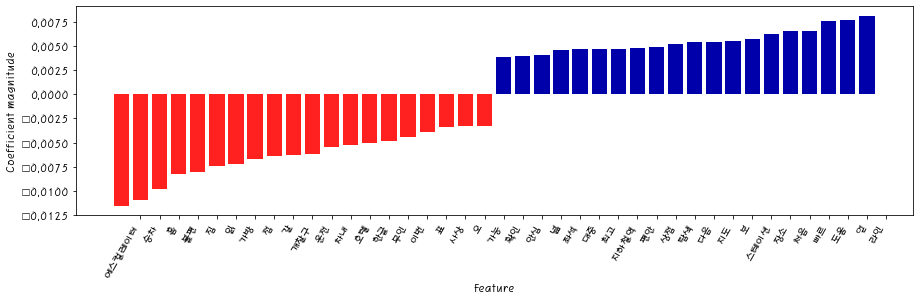

In [328]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, etc_names, n_top_features=20)
plt.show()

# 기타-축제

In [346]:
cv_etc_festival=CountVectorizer(
    min_df=0.03,
    max_df=0.1,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

etc_festival_X=cv_etc_festival.fit_transform(etc_festival['word'])

print(etc_festival_X.shape)
cv_etc_festival.vocabulary_

(51, 129)


{'최고': 105,
 '올해': 81,
 '괜찮': 15,
 '구경': 16,
 '준비': 99,
 '아이': 71,
 '다음': 33,
 '같': 5,
 '불꽃놀이': 58,
 '크': 109,
 '오': 79,
 '밤': 52,
 '모양': 48,
 '광안': 14,
 '대교': 35,
 '일대': 89,
 '마린': 44,
 '시티': 68,
 '가을': 2,
 '하늘': 115,
 '혼잡': 121,
 '땅': 42,
 '열리': 76,
 '행사': 120,
 '당일': 34,
 '오후': 80,
 '지하철': 102,
 '붐비': 59,
 '잡': 90,
 '지역': 100,
 '높': 31,
 '보이': 56,
 '해수욕장': 117,
 '마지막': 45,
 '대표': 36,
 '근처': 22,
 '바람': 50,
 '밤하늘': 53,
 '부': 57,
 '이때': 86,
 '가격': 0,
 '규모': 20,
 '주제': 98,
 '되': 41,
 '시작': 67,
 '상점': 61,
 '아름답': 70,
 '유료': 84,
 '노래': 29,
 '낭만': 28,
 '석': 63,
 '나오': 27,
 '후': 126,
 '가지': 3,
 '돌아가': 39,
 '필요': 114,
 '참석': 103,
 '숨': 66,
 '주변': 97,
 '예약': 78,
 '다리': 32,
 '행복': 119,
 '가능': 1,
 '열차': 77,
 '휴식': 128,
 '재미': 93,
 '확인': 124,
 '기다리': 23,
 '후회': 127,
 '조명': 96,
 '처음': 104,
 '전': 95,
 '결정': 8,
 '밖': 51,
 '없': 73,
 '화장실': 122,
 '음식': 85,
 '판매': 112,
 '구입': 17,
 '놀랍': 30,
 '방문': 54,
 '지점': 101,
 '장엄': 92,
 '길': 26,
 '가치': 4,
 '관중': 12,
 '만드': 46,
 '생각': 62,
 '개최': 7,
 '레이저': 43,
 '바

In [347]:
etc_festival_names=cv_etc_festival.get_feature_names()
print ( "기능 수 : {}". format (len (etc_festival_names)))
print(etc_festival_names)

기능 수 : 129
['가격', '가능', '가을', '가지', '가치', '같', '개인', '개최', '결정', '계획', '공연', '관광', '관중', '광', '광안', '괜찮', '구경', '구입', '군중', '권장', '규모', '그렇', '근처', '기다리', '기대', '기타', '길', '나오', '낭만', '노래', '놀랍', '높', '다리', '다음', '당일', '대교', '대표', '도보', '도착', '돌아가', '동기', '되', '땅', '레이저', '마린', '마지막', '만드', '모래', '모양', '바', '바람', '밖', '밤', '밤하늘', '방문', '배경', '보이', '부', '불꽃놀이', '붐비', '삶', '상점', '생각', '석', '세계', '소요', '숨', '시작', '시티', '식사', '아름답', '아이', '얻', '없', '여행', '열', '열리', '열차', '예약', '오', '오후', '올해', '요리', '위치', '유료', '음식', '이때', '이번', '이벤트', '일대', '잡', '장소', '장엄', '재미', '저녁', '전', '조명', '주변', '주제', '준비', '지역', '지점', '지하철', '참석', '처음', '최고', '추천', '친구', '카페', '크', '테이블', '통과', '판매', '편리', '필요', '하늘', '항공', '해수욕장', '해안', '행복', '행사', '혼잡', '화장실', '확보', '확인', '활동', '후', '후회', '휴식']


In [348]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(etc_festival_X,etc_festival['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best cross-validation score: 0.92
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


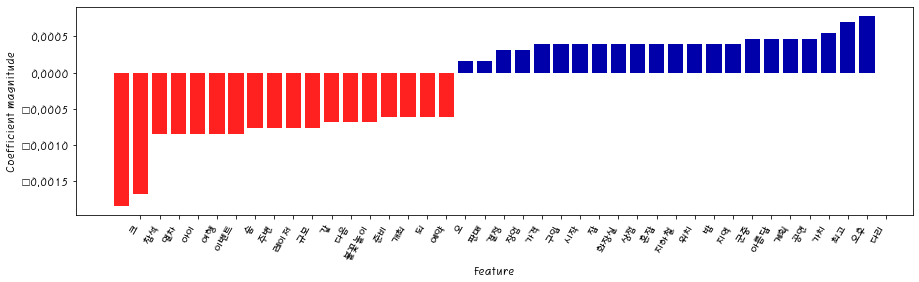

In [349]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, etc_festival_names, n_top_features=20)
plt.show()

# 기타-안내

In [361]:
cv_etc_info=CountVectorizer(
    min_df=0.03,
    max_df=0.5,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())

etc_info_X=cv_etc_info.fit_transform(etc_info['word'])

print(etc_info_X.shape)
cv_etc_info.vocabulary_

(264, 140)


{'관광': 10,
 '정보': 103,
 '얻': 77,
 '공항': 9,
 '국제선': 18,
 '층': 119,
 '옆': 84,
 '곳': 8,
 '지도': 107,
 '알': 75,
 '때': 34,
 '이용': 91,
 '여행': 80,
 '타': 124,
 '가': 0,
 '시간': 68,
 '오': 85,
 '같': 4,
 '하': 131,
 '앞': 76,
 '필요': 130,
 '없': 78,
 '안내소': 74,
 '사람': 57,
 '친절': 120,
 '관광객': 11,
 '좋': 105,
 '정도': 102,
 '많': 39,
 '먹': 41,
 '전': 101,
 '구입': 15,
 '안내': 73,
 '받': 48,
 '설명': 62,
 '찾': 114,
 '위치': 87,
 '도시': 27,
 '쉽': 65,
 '듣': 32,
 '질문': 111,
 '크': 122,
 '작': 98,
 '생각': 60,
 '라운지': 35,
 '안': 72,
 '국내선': 16,
 '면세점': 42,
 '밖': 47,
 '시설': 70,
 '모르': 43,
 '건물': 6,
 '일': 93,
 '도착': 29,
 '리무진': 38,
 '물': 46,
 '외국인': 86,
 '직원': 110,
 '거리': 5,
 '택시': 126,
 '환승': 137,
 '시내': 69,
 '들': 33,
 '제공': 104,
 '나오': 23,
 '출구': 117,
 '방문': 49,
 '도움': 28,
 '되': 31,
 '비행기': 55,
 '체크인': 116,
 '이민': 90,
 '지역': 108,
 '후': 139,
 '가능': 1,
 '상점': 59,
 '효율': 138,
 '국제': 17,
 '크기': 123,
 '혼잡': 135,
 '빠르': 56,
 '출발': 118,
 '수하물': 64,
 '짐': 112,
 '항공편': 133,
 '일반': 94,
 '동안': 30,
 '아침': 71,
 '음식': 88,
 '레스토랑': 36,
 '한국어':

In [362]:
etc_info_names=cv_etc_info.get_feature_names()
print ( "기능 수 : {}". format (len (etc_info_names)))
print(etc_info_names)

기능 수 : 140
['가', '가능', '가이드', '가지', '같', '거리', '건물', '경우', '곳', '공항', '관광', '관광객', '관광지', '괜찮', '교통', '구입', '국내선', '국제', '국제선', '근처', '기다리', '기차', '길', '나오', '남포', '넓', '대응', '도시', '도움', '도착', '동안', '되', '듣', '들', '때', '라운지', '레스토랑', '로비', '리무진', '많', '말', '먹', '면세점', '모르', '무료', '문제', '물', '밖', '받', '방문', '방향', '배', '버스', '보', '보이', '비행기', '빠르', '사람', '사용', '상점', '생각', '서비스', '설명', '센터', '수하물', '쉽', '스탭', '승강장', '시간', '시내', '시설', '아침', '안', '안내', '안내소', '알', '앞', '얻', '없', '여객', '여행', '여행자', '역', '영어', '옆', '오', '외국인', '위치', '음식', '이동', '이민', '이용', '이전', '일', '일반', '일본어', '일부', '자체', '작', '장소', '적', '전', '정도', '정보', '제공', '좋', '중국어', '지도', '지역', '지하철', '직원', '질문', '짐', '차이', '찾', '책자', '체크인', '출구', '출발', '층', '친절', '카운터', '크', '크기', '타', '타운', '택시', '터미널', '팜플렛', '편리', '필요', '하', '한국어', '항공편', '호텔', '혼잡', '화장실', '환승', '효율', '후']


In [363]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(etc_info_X,etc_info['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.62
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


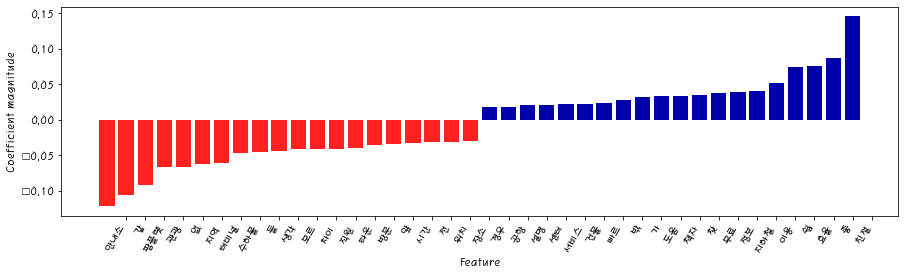

In [364]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, etc_info_names, n_top_features=20)
plt.show()